In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv','customers'),
    ('orders.csv','orders'),
    ('sellers.csv','sales'),
    ('products.csv','products'),
    ('order_items.csv','order_items'),
    ('payments.csv','payments'),
    ('geolocation.csv','geolocation')
      # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/HP/OneDrive/Desktop/e-commerce data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [ ]:
pip install mysql-connector-python

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'customers.csv',
 'e-commerce-proj.ipynb',
 'geolocation.csv',
 'orders.csv',
 'order_items.csv',
 'payments.csv',
 'products.csv',
 'sellers.csv',
 'sql-python_prac.ipynb']

In [4]:
import pandas as pd

In [7]:
customers=pd.read_csv("customers.csv")
orders=pd.read_csv("orders.csv")


In [ ]:
orders.head()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="root123",
    database="ecommerce"
)
cur=db.cursor()

In [6]:
query="""show tables from ecommerce"""
cur.execute(query)
data=cur.fetchall()
print(data)

[('customers',), ('geolocation',), ('order_items',), ('orders',), ('payments',), ('products',), ('sales',)]


In [ ]:
query="""select distinct customer_city from customers"""
# making sure of previous result is completely fetched using nextset()
try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
while True:
    customer_cities=cur.fetchone()
    if customer_cities is None:
        break
    print(customer_cities)

In [36]:
query2="""select distinct customer_city from customers"""

# make sure the previous result is completely fetched
try:
    while cur.nextset():
        pass
except:
    pass
cur.execute(query2)

row=cur.fetchone()
print(row)

('franca',)


# count the number of orders placed in 2017

In [3]:
# count the number of orders placed in 2017
query2="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
try:
    while cur.nextset():
        pass
except:
    pass
cur.execute(query2)
count=cur.fetchall()
print(count)

[(45101,)]


# find the total sales per category

In [35]:
# find the total sales per category
query="""select upper(pd.product_category) as category,round(sum(pay.payment_value)) as total_sales
from order_items as od
join products as pd 
on pd.product_id=od.product_id
join payments as pay
on pay.order_id=od.order_id
group by category """

cur.execute(query)
data= cur.fetchall()
data

df=pd.DataFrame(data,columns=["category","total_sales"])
df

,category,total_sales
0,PERFUMERY,506739.0
1,FURNITURE DECORATION,1430176.0
2,TELEPHONY,486882.0
3,BED TABLE BATH,1712554.0
4,AUTOMOTIVE,852294.0
...,...,...
69,CDS MUSIC DVDS,1199.0
70,LA CUISINE,2914.0
71,FASHION CHILDREN'S CLOTHING,786.0
72,PC GAMER,2174.0


In [36]:
df.head()

,category,total_sales
0,PERFUMERY,506739.0
1,FURNITURE DECORATION,1430176.0
2,TELEPHONY,486882.0
3,BED TABLE BATH,1712554.0
4,AUTOMOTIVE,852294.0


<Axes: xlabel='total_sales'>

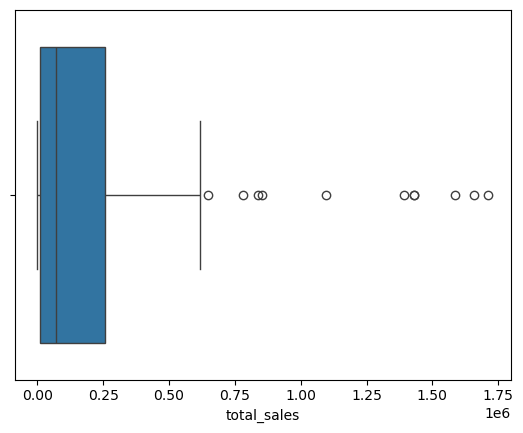

In [37]:
sns.boxplot(data=df,x="total_sales")

In [38]:
import numpy as np
q1=np.percentile(df["total_sales"],0.25)
q3=np.percentile(df["total_sales"],0.75)

In [39]:
iqr=q3-q1
iqr
low=q1-1.5*iqr
upper=q3+1.5*iqr
newdata=df[(df['total_sales']>=low) & (df['total_sales']<=upper)]
newdata.head()

,category,total_sales
71,FASHION CHILDREN'S CLOTHING,786.0
73,INSURANCE AND SERVICES,325.0


In [40]:
newdata.shape

(2, 2)

In [41]:
newdata['total_sales'].mean()

np.float64(555.5)

<Axes: xlabel='total_sales'>

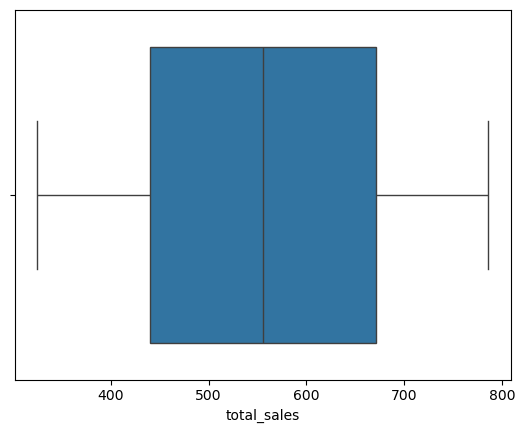

In [42]:
sns.boxplot(data=newdata,x="total_sales")

<Axes: xlabel='total_sales', ylabel='None'>

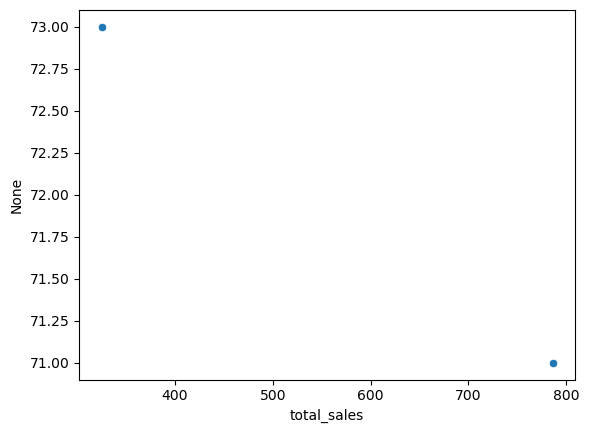

In [43]:
sns.scatterplot(data=newdata,x="total_sales",y=newdata.index)

In [44]:
df["total_sales"].mean()

np.float64(274434.2702702703)

In [10]:
df.describe()

,total_sales
count,32951.000000
mean,616.311250
std,2166.898824
min,10.000000
25%,92.000000
50%,198.000000
75%,480.000000
max,109313.000000


In [45]:
newdata.describe()

,total_sales
count,2.000000
mean,555.500000
std,325.976226
min,325.000000
25%,440.250000
50%,555.500000
75%,670.750000
max,786.000000


# calculate the percentage of orders that were paid in installments

In [13]:
query=""" select (sum(case when payment_installments >=1 then 1 else 0 end)*100.0)
/ count(*) as installment_percentage
from payments
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
data

[(Decimal('99.99807'),)]

In [19]:
query=""" select sum(case when payment_installments >1 then 1 else 0 end)/count(*)*100.0 from payments
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
data

[(Decimal('49.41763'),)]

# count number of customer from each state

In [3]:
query=""" select customer_state,customer_city,count(customer_id) as num_of_customers from customers group by customer_state,customer_city
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
import pandas as pd
df=pd.DataFrame(data,columns=['customer_state','customer_city','num_of_customers',])
df

,customer_state,customer_city,num_of_customers
0,SP,franca,161
1,SP,sao bernardo do campo,938
2,SP,sao paulo,15540
3,SP,mogi das cruzes,383
4,SP,campinas,1444
...,...,...,...
4305,PE,siriji,1
4306,SP,natividade da serra,1
4307,RS,monte bonito,1
4308,RN,sao rafael,1


In [40]:
df[df['customer_state']=='SP'].shape

(629, 3)

In [4]:
df1=df.groupby('customer_state')['num_of_customers'].sum().reset_index()

In [5]:
df1=pd.DataFrame(df1)

In [48]:
df1.shape

(27, 2)

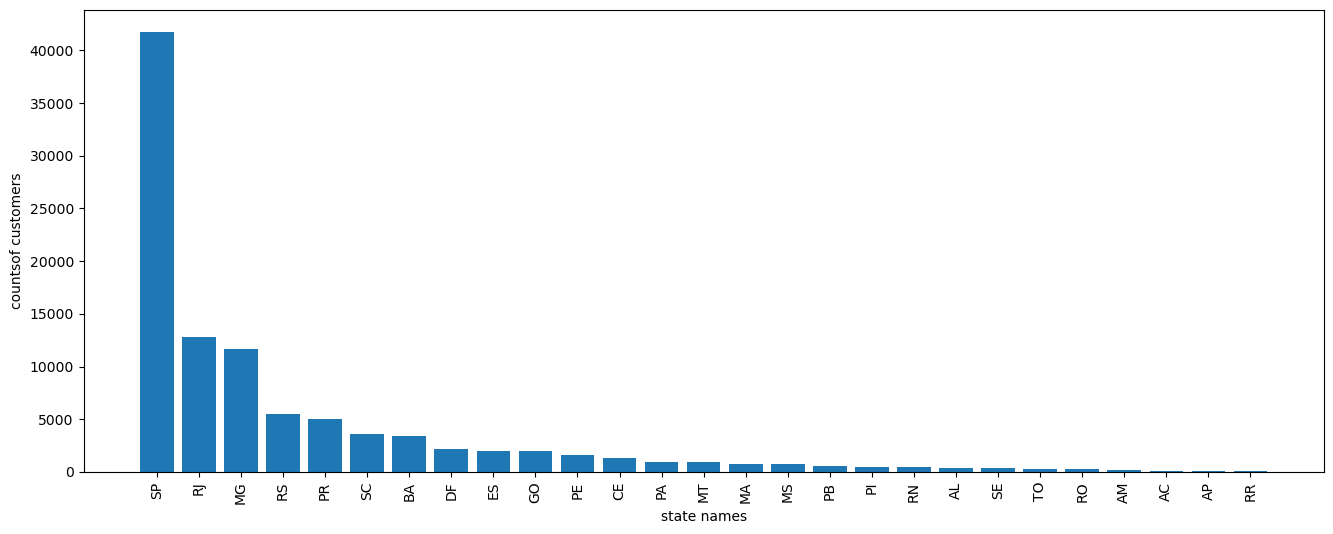

In [6]:
import matplotlib.pyplot as plt
df1=df1.sort_values(by ='num_of_customers',ascending=False)
plt.figure(figsize=(16,6))
plt.bar(df1['customer_state'],df1['num_of_customers'])
plt.xlabel('state names')
plt.ylabel('countsof customers')
plt.xticks(rotation=90)
plt.show()

# calculate the number of orders per mongth in 2018

In [9]:
query=""" select monthname(order_purchase_timestamp) as months,count(order_id) as count_of_orders
from orders
where year(order_purchase_timestamp)=2018
group by month(order_purchase_timestamp),months
order by month(order_purchase_timestamp) ;
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
data=pd.DataFrame(data,columns=['months','count of orders'])
data


,months,count of orders
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


Text(0, 0.5, 'counts of orders')

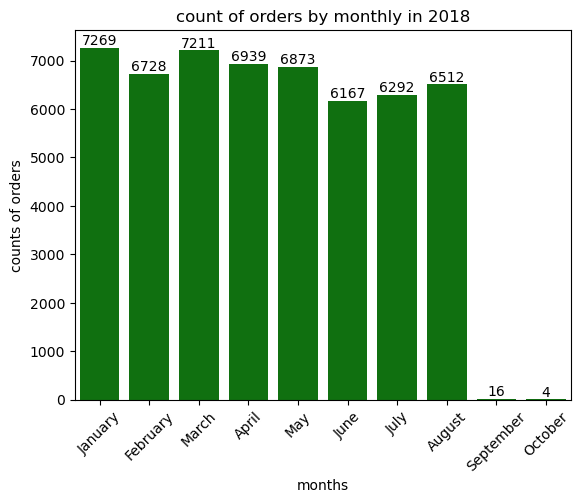

In [29]:
import seaborn as sns
ax=sns.barplot(data=data,x='months',y='count of orders',color='green')
#plt.bar(data['months'],data['count of orders'])
ax.bar_label(ax.containers[0])
plt.title('count of orders by monthly in 2018')
plt.xlabel('months')
plt.xticks(rotation=45)
plt.ylabel('counts of orders')

In [20]:
import matplotlib
print(matplotlib.__version__)

3.10.0


In [25]:
print(ax.containers)
print(len(ax.containers))


[<BarContainer object of 10 artists>]
1


# find the average number of product per order group by customer city

In [ ]:
query=""" with count_per_orders as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as OC
   from orders join order_items 
   on orders.order_id = order_items.order_id
   group by orders.order_id, orders.customer_id)
   
select customers.customer_city as customer_city, round(avg(count_per_orders.OC),2) as avg_of_orders_per_product
   from customers join count_per_orders
   on customers.customer_id = count_per_orders.customer_id
   group by customers.customer_city
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
data

In [34]:
data=pd.DataFrame(data,columns=['customer city','avg of order per products'])
data

,customer city,avg of order per products
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
...,...,...
4105,buriti,3.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# calculate the percentage of total revenue contributed by each product category

In [18]:
query="""select 
    upper(pd.product_category) as category,
    round((sum(pay.payment_value)/(select sum(payment_value) from payments))*100,2) as percentage_sales
from order_items as od
join products as pd 
on pd.product_id=od.product_id
join payments as pay
on pay.order_id=od.order_id
group by category
order by percentage_sales desc
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
import pandas as pd
data=pd.DataFrame(data,columns=['category','sales_percentage'])
data.head()

,category,sales_percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


# identify the correlation betweeen the product price and the number of times a product has been purchased

In [12]:
query="""select products.product_category,count(order_items.product_id),avg(order_items.price)
    from products join order_items
    on products.product_id = order_items.product_id
    group by products.product_category
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()

data=pd.DataFrame(data,columns=['category','count','price'])
data.head()

,category,count,price
0,HEALTH BEAUTY,9670,130.163531
1,sport leisure,8641,114.344285
2,Cool Stuff,3796,167.357969
3,computer accessories,7827,116.513903
4,Watches present,5991,201.135984


In [14]:
import numpy as np

In [15]:
np.cov(data['count'],data['price'])

array([[6579121.55423917,  -39605.97718259],
       [ -39605.97718259,   21094.06114981]])

In [ ]:
 positive means there is positive relation slightly proportional 

In [17]:
np.corrcoef(data['count'],data['price'])

array([[ 1.        , -0.10631552],
       [-0.10631552,  1.        ]])

In [18]:
data[['count','price']].corr()

,count,price
count,1.000000,-0.106316
price,-0.106316,1.000000


-0.106316 means the relation between variables is not strong and not really dependent in each other 

# calculate the total revenue generated by each seller and rank them by revenue

In [ ]:
query="""select * ,dense_rank() over(order by total_revenue desc) as rn from
(select order_items.seller_id, round(sum(payments.payment_value),2) as total_revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""
try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
data

# calculate the moving average of order values for each customer over their order history

In [2]:
query="""select *, avg(pays) over( partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
 from 
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as pays
 from orders join payments
 on orders.order_id = payments.order_id) as a
"""

try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
import pandas as pd
data=pd.DataFrame(data,columns=['customer_id','order_purchase_time','pays','mov_avg'])
data.head()

,customer_id,order_purchase_time,pays,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


In [4]:
data.head()

,customer_id,order_purchase_time,pays,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


# calculate the cummulative sales per month for each year

In [4]:
query = """select years, months,pays, sum(pays) over(order by years,months) as cummulative_sales 
from 
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months, round(sum(payments.payment_value),2) as pays
from orders join payments
on orders.order_id = payments.order_id
group by years, months
order by years, months) as subquery
"""
try:
    while cur.nextset():
        pass
except:
    pass

cur.execute(query)
data= cur.fetchall()
import pandas as pd
data=pd.DataFrame(data,columns=['years','months','months_sales','cummulative_sales'])
data.head()

,years,months,months_sales,cummulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


# Calculate the year over year growth rate of total sales

In [14]:
query = """ 
with a as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as pays
from orders join payments
on orders.order_id = payments.order_id
group by years),
b as(select years, pays, lag(pays,1) over(order by years) as previous_pays from a)
select years, pays, previous_pays, round((pays - previous_pays)/previous_pays *100 ,3) as yoy_growth from b;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['years','pays','previous_pays','yoy_growth'])
df

,years,pays,previous_pays,yoy_growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.704
2,2018,8699763.05,7249746.73,20.001


# calculate the retention rate the customers, defined as the percentage of the customers who make another purchase with in the 6 months of their their first purchase

In [12]:
query = """
with a as(select customers.customer_id, min(orders.order_purchase_timestamp) as first_order
from customers join orders 
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as(select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month) 
group by a.customer_id) 
select 100* (count(distinct b.customer_id)/count(distinct a.customer_id))
from a left join b
on a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('0.0000'),)]

The result is empty because no customers have a repeat order within 6 months of their first purchase, so the retention calculation has no qualifying records.

# Identify the top 3 customer who spend the most maney in each year

In [ ]:
order by year based on doing rank of payment_value as order by desc from orders and payment tables